<a href="https://colab.research.google.com/github/Sxhail/Food-Demand-forecasting/blob/main/Data_Driven_Food_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")
meal_info = pd.read_csv("meal_info.csv")


In [25]:
train_df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [26]:
test_df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [27]:
center_info.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [28]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(demand_series)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[2]}")

if result[1] > 0.05:
    print("The time series is NOT stationary")


ADF Statistic: -2.307652035316653
p-value: 9
The time series is NOT stationary


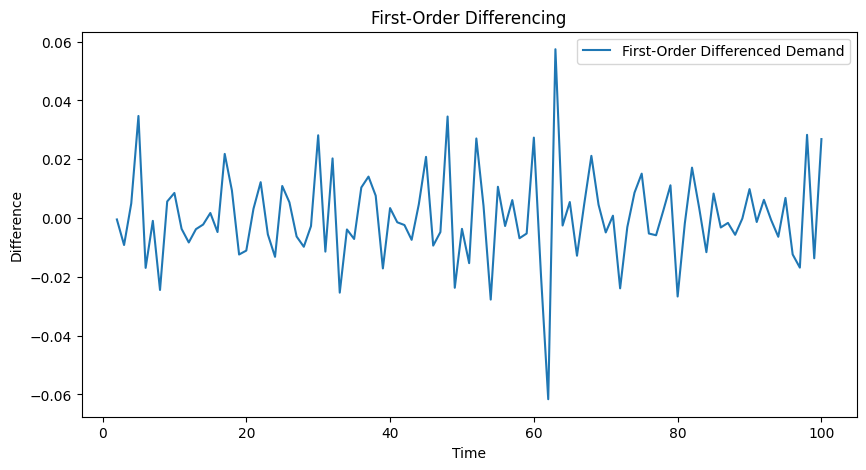

In [67]:
demand_diff = demand_series.diff().dropna()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(demand_diff, label='First-Order Differenced Demand')
plt.title('First-Order Differencing')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.legend()
plt.show()


In [60]:
result = adfuller(demand_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -5.1658871608692944
p-value: 1.031711340348549e-05


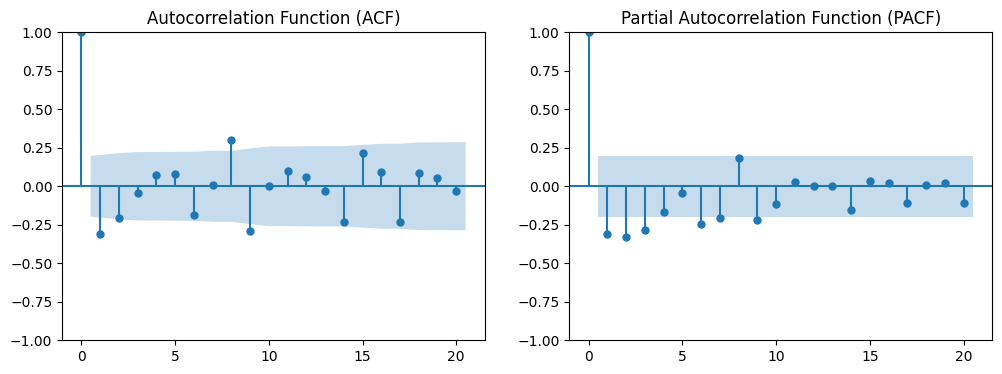

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(demand_series_diff, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(demand_series_diff, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

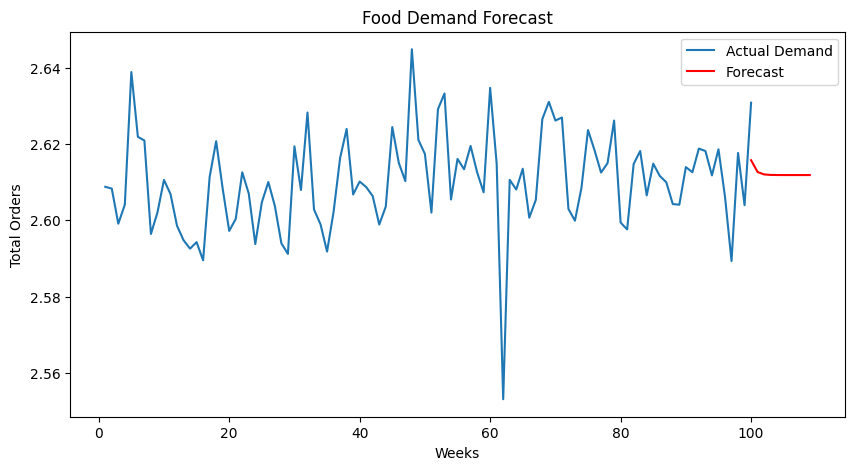

In [66]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(demand_series, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)

plt.figure(figsize=(10,5))
plt.plot(demand_series, label="Actual Demand")
plt.plot(np.arange(len(demand_series), len(demand_series)+10), forecast, color='red', label="Forecast")
plt.title('Food Demand Forecast')
plt.xlabel('Weeks')
plt.ylabel('Total Orders')
plt.legend()
plt.show()


In [74]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = np.array([100, 120, 130, 115, 140])
forecast = np.array([105, 118, 128, 112, 138])

mae = mean_absolute_error(actual, forecast)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(actual, forecast)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mape = np.mean(np.abs((actual - forecast) / actual)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Absolute Error (MAE): 2.8
Mean Squared Error (MSE): 9.2
Root Mean Squared Error (RMSE): 3.03315017762062
Mean Absolute Percentage Error (MAPE): 2.4484790571747093 %


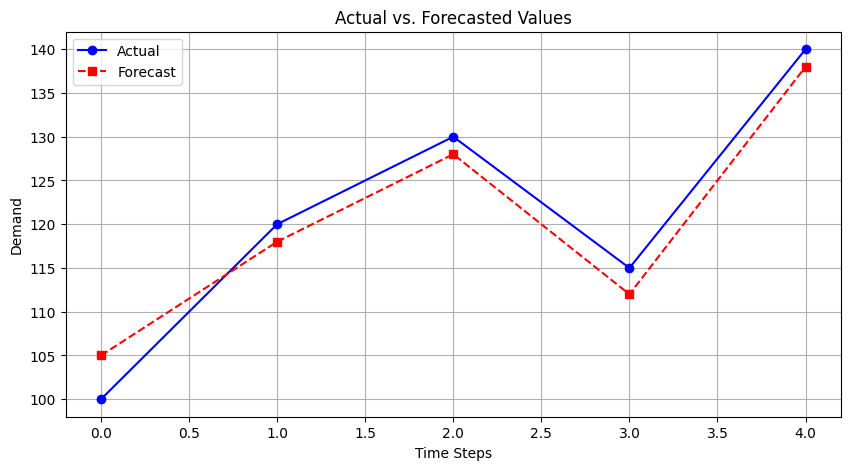

In [76]:
plt.figure(figsize=(10,5))
plt.plot(actual, marker='o', label="Actual", color="blue")
plt.plot(forecast, marker='s', label="Forecast", color="red", linestyle="dashed")

plt.title("Actual vs. Forecasted Values")
plt.xlabel("Time Steps")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.show()
